<a href="https://colab.research.google.com/github/Shaimaa307/Simple-NN-on-Fashion-MNIST_ASSIGMENT2/blob/main/Simple_NN_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup and Data Loading**

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Check for device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalizes to [-1, 1] range. A simple ToTensor() normalizes to [0,1].
                                        # Let's stick to the prompt's [0,1] for simplicity.
])

transform = transforms.ToTensor() # This scales images to [0.0, 1.0]

# Download and load the training data
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

# Download and load the test data
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform
)

# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define class names for plotting
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.50MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 7.66MB/s]


# **Model Architecture**

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input layer is implicitly defined by the first linear layer
        # The image is 28x28, which is flattened to 784 features.
        self.flatten = nn.Flatten()
        self.layer1 = nn.Linear(28 * 28, 256)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(256, 128)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(128, 10) # 10 output classes

    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.relu1(x)
        x = self.layer2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

# Instantiate the model and move it to the selected device
model = SimpleNN().to(device)
print(model)

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (layer2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=128, out_features=10, bias=True)
)


# **Training Setup**

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 10

#**Training and Evaluation Loop**




In [ ]:
# Lists to store history
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # --- Training ---
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # --- Testing ---
    model.eval()
    running_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct_test / total_test
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

print("\n--- Training Finished ---")

Epoch [1/10], Train Loss: 0.5182, Train Accuracy: 81.56%, Test Loss: 0.4222, Test Accuracy: 84.87%
Epoch [2/10], Train Loss: 0.3672, Train Accuracy: 86.61%, Test Loss: 0.3866, Test Accuracy: 86.11%
Epoch [3/10], Train Loss: 0.3298, Train Accuracy: 87.81%, Test Loss: 0.3751, Test Accuracy: 86.41%
Epoch [4/10], Train Loss: 0.3074, Train Accuracy: 88.55%, Test Loss: 0.3538, Test Accuracy: 87.27%
Epoch [5/10], Train Loss: 0.2881, Train Accuracy: 89.27%, Test Loss: 0.3402, Test Accuracy: 87.82%
Epoch [6/10], Train Loss: 0.2739, Train Accuracy: 89.71%, Test Loss: 0.3615, Test Accuracy: 86.71%
Epoch [7/10], Train Loss: 0.2607, Train Accuracy: 90.17%, Test Loss: 0.3409, Test Accuracy: 87.78%
Epoch [8/10], Train Loss: 0.2492, Train Accuracy: 90.70%, Test Loss: 0.3409, Test Accuracy: 88.14%
Epoch [9/10], Train Loss: 0.2382, Train Accuracy: 91.06%, Test Loss: 0.3254, Test Accuracy: 88.67%
Epoch [10/10], Train Loss: 0.2289, Train Accuracy: 91.31%, Test Loss: 0.3372, Test Accuracy: 88.34%

--- Trai

# **Visualizations**
Loss and Accuracy per Epoch
Visualizing the training and test metrics helps us understand the model's learning progress and check for issues like overfitting.

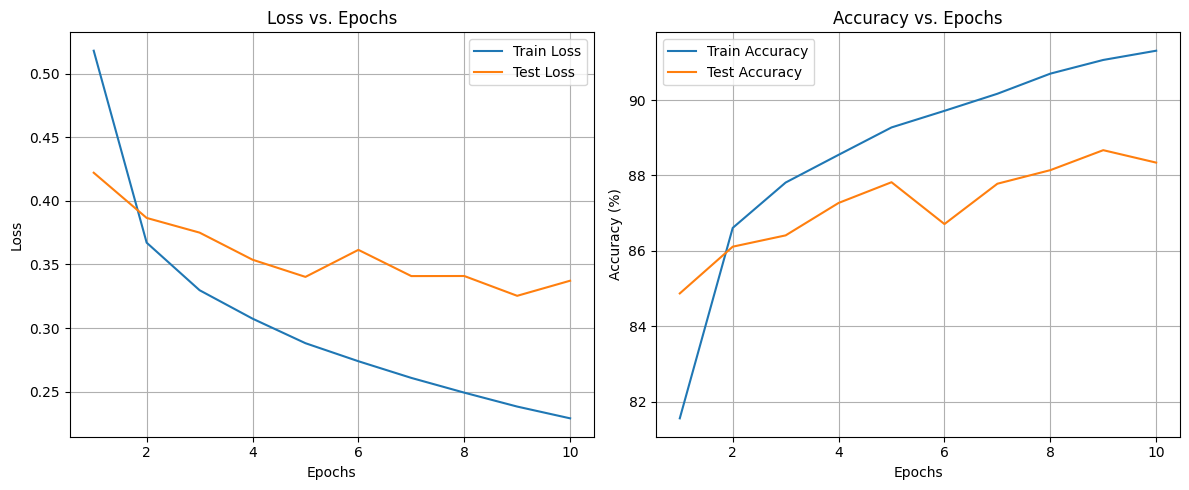

In [ ]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#**Confusion Matrix**
A confusion matrix gives a detailed breakdown of which classes the model is confusing with others.**A confusion matrix gives a detailed breakdown of which classes the model is confusing with others.

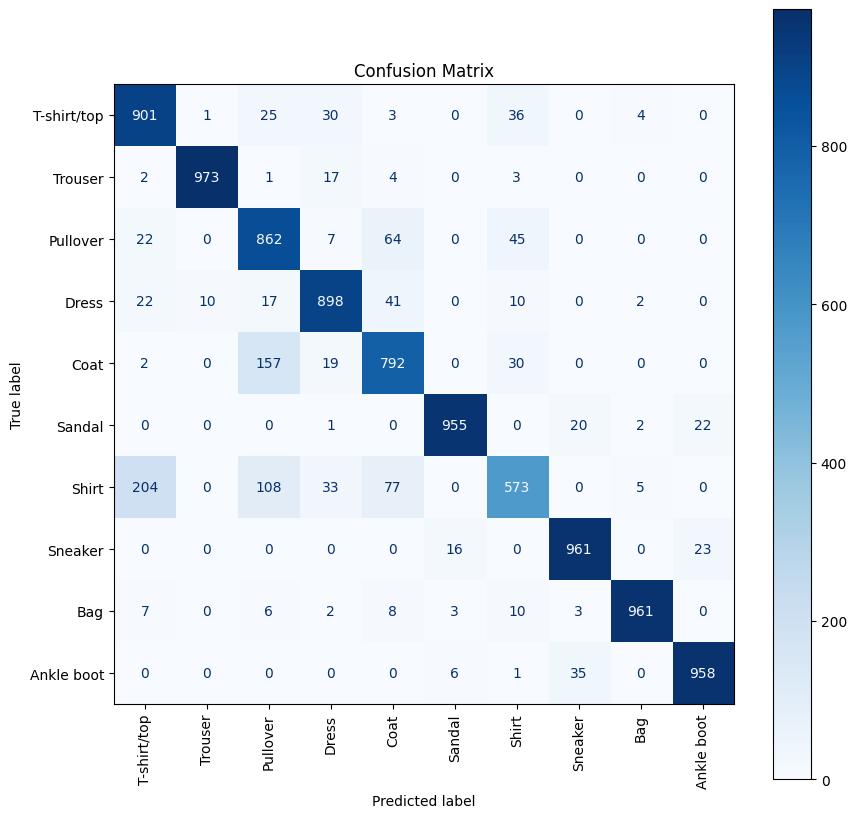

In [ ]:
# Get all predictions for the test set
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create and display the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()


#**Example Image Predictions**


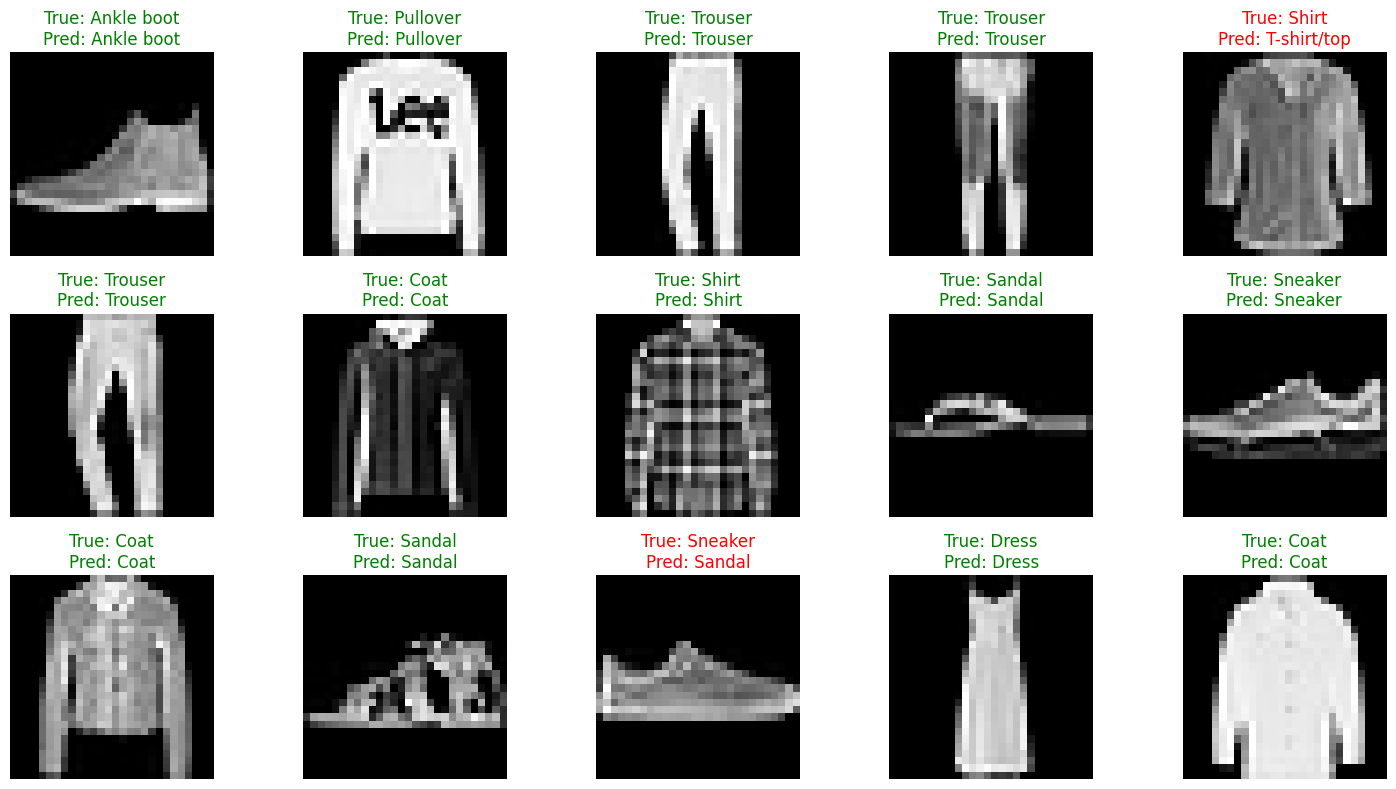

In [ ]:
# Function to visualize predictions
def plot_predictions(images, labels, preds, num_samples=15):
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        plt.subplot(3, 5, i + 1)
        img = images[i].squeeze() # Remove channel dimension
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        pred_label = class_names[preds[i]]
        true_label = class_names[labels[i]]
        color = 'green' if preds[i] == labels[i] else 'red'
        plt.title(f'True: {true_label}\nPred: {pred_label}', color=color)
    plt.tight_layout()
    plt.show()

# Get a batch of test data to show
dataiter = iter(test_loader)
images, labels = next(dataiter)
images_gpu = images.to(device)

# Get predictions
outputs = model(images_gpu)
_, preds = torch.max(outputs, 1)

# Move data to CPU for plotting
images = images.cpu().numpy()
preds = preds.cpu().numpy()
labels = labels.cpu().numpy()

plot_predictions(images, labels, preds)

# **Conclusion**

**Analysis of the training process showed a healthy learning trend, with a steady decrease in loss and an increase in accuracy for both the training and test sets. This indicates that the model learned to generalize patterns effectively without significant overfitting. The confusion matrix revealed that the model struggled to differentiate between visually similar categories, such as 'Shirt,' 'T-shirt/top,' and 'Pullover,' which represents the main challenge within this dataset. Overall, this simple neural network proved to be an excellent and effective baseline for the task.**




# **Error Analysis**

Displaying 5 examples of 'Shirts' misclassified as 'T-shirt/top'


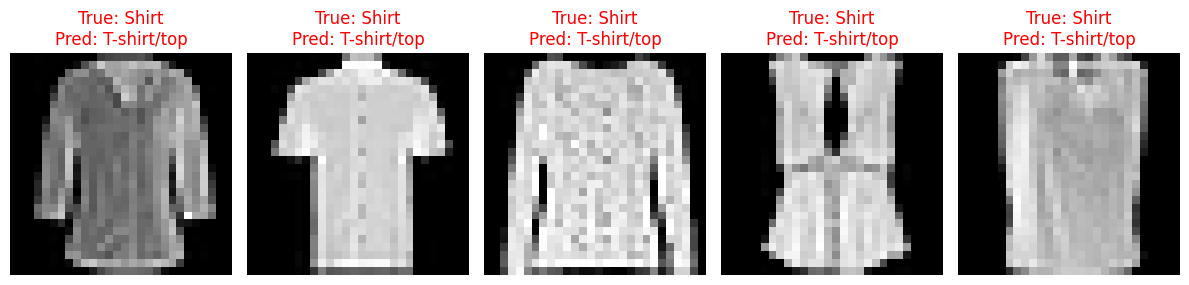

In [ ]:
# Create a new cell and add this code

# Let's find and visualize the most common mistakes
# We will look for images that are actually 'Shirt' but were predicted as 'T-shirt/top'

misclassified_images = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        # Move data to the device (GPU or CPU)
        images_device = images.to(device)
        labels_device = labels.to(device)

        # Get model predictions
        outputs = model(images_device)
        _, predicted = torch.max(outputs, 1)

        # Compare predictions with true labels
        for i in range(len(labels)):
            true_label = labels[i].item()
            pred_label = predicted[i].item()

            # Check for our specific mistake: True label is 'Shirt' (6) and Predicted is 'T-shirt/top' (0)
            if true_label == 6 and pred_label == 0:
                misclassified_images.append(images[i])

# Stop once we have enough examples to show
NUMBER_TO_SHOW = 5
if len(misclassified_images) > NUMBER_TO_SHOW:

    print(f"Displaying {NUMBER_TO_SHOW} examples of 'Shirts' misclassified as 'T-shirt/top'")

    # Plot the misclassified images
    plt.figure(figsize=(12, 5))
    for i in range(NUMBER_TO_SHOW):
        plt.subplot(1, NUMBER_TO_SHOW, i + 1)
        plt.imshow(misclassified_images[i].squeeze(), cmap='gray')
        plt.title("True: Shirt\nPred: T-shirt/top", color='red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Found fewer than 5 examples of this specific mistake.")

**In-Depth Error Analysis: Why Does the Model Confuse "Shirt" and "T-shirt"?**
After observing from the confusion matrix that the 'Shirt' category was the most frequently misclassified, especially as 'T-shirt/top,' we decided to investigate these errors visually. The preceding code cell was designed to isolate and display specific examples of 'Shirt' images that the model incorrectly predicted as 'T-shirt/top' to understand the root cause of this confusion.

**Analysis of Visual Results**
The results displayed above are highly insightful and demonstrate that the model's mistakes are not random. We can see that the images the model misclassifies are often inherently ambiguous:

Visual Similarity: Some images (like the second from the left) feature a shirt with short sleeves, making its overall silhouette very similar to that of a t-shirt.

**Low Resolution:** The low 28x28 pixel resolution makes it difficult to discern fine details that differentiate the two categories, such as a formal collar or the presence of buttons.

**Confusing Patterns** :Certain patterns and designs on the shirts can obscure their fundamental features, leading the model to rely solely on the basic shape for classification.

**Conclusion**
This analysis confirms that the model struggles with the subtle visual differences between these categories, which is a common challenge for simple neural networks when processing images. It highlights that improving the model's performance on this task would likely require a more advanced architecture, such as a Convolutional Neural Network (CNN), which is better designed to recognize fine-grained spatial features.